In [1]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models, datasets

2024-03-13 22:27:39.452237: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-13 22:27:39.487325: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 22:27:39.487356: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 22:27:39.488018: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 22:27:39.493723: I tensorflow/core/platform/cpu_feature_guar

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

y_train.shape

(60000,)

In [3]:
x_test = np.load("validation_x.npy")
y_test = np.load("validation_y.npy")

In [4]:

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    # layers.MinPooling2D((2,2)),
])

2024-03-13 22:27:41.896528: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-03-13 22:27:41.896549: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: PC
2024-03-13 22:27:41.896553: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: PC
2024-03-13 22:27:41.896679: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.161.7
2024-03-13 22:27:41.896692: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.161.7
2024-03-13 22:27:41.896696: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 535.161.7


In [6]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=2, batch_size=10,validation_data=(x_test,y_test))

Epoch 1/2
6000/6000 [==============================] - 21s 3ms/step - loss: 0.1300 - accuracy: 0.9607 - val_loss: 1.8183 - val_accuracy: 0.6010
Epoch 2/2
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0475 - accuracy: 0.9852 - val_loss: 1.7303 - val_accuracy: 0.6461


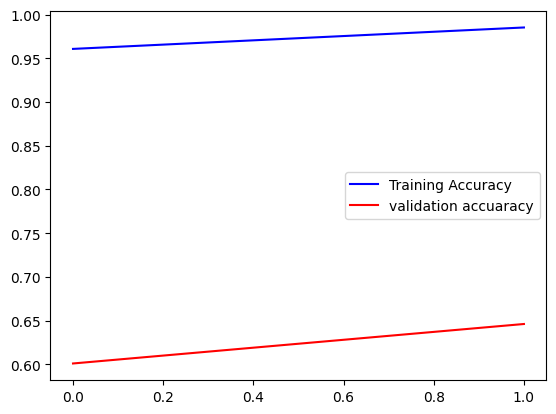

In [8]:
plt.plot(history.history['accuracy'],color='b',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color='r',label='validation accuaracy')
plt.legend()

625/625 [==============================] - 1s 2ms/step


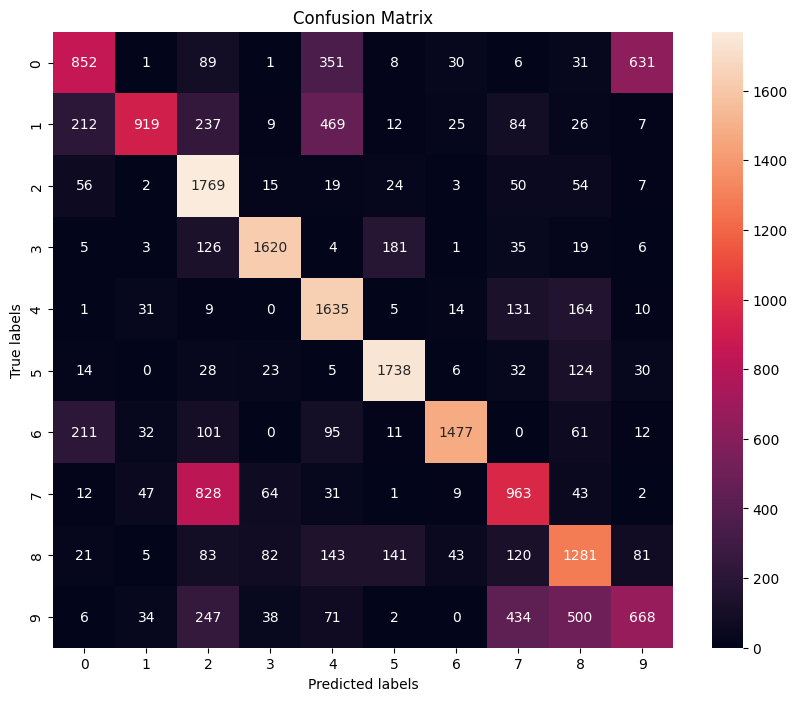

In [9]:
import seaborn as sns
y_test=tf.one_hot(y_test.astype(np.int32),depth=10)
# Predict classes probabilities for test data
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1) 
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true_classes, y_pred_classes) 

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
